### 목표
 - 유방암 데이터를 활용해서 악성/양성 분류하는 실습
 - 의학 데이터에 대해서 이해해보자

In [33]:
# 필요한 도구 불러오기(환경설정)
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [34]:
# 데이터 확인하기
cancer_data = load_breast_cancer()
cancer_data

# 번치 객체 형식으로 저장된 데이터
# 벨류값 접근 방법 : 변수명['키'], 변수명.키

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [35]:
# 키값들 확인하기
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
# 데이터 살펴보기
# 문제 데이터
cancer_data.data
print('데이터 크기 : ', cancer_data.data.shape)

데이터 크기 :  (569, 30)


In [37]:
# 데이터를 정리한 컬럼명 : feature_names
cancer_data.feature_names # 30

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [38]:
# 답데이터 : .target
cancer_data.target # 569 (cancer_data.target.size)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [39]:
# 답데이터 이름 확인 : .target_names
cancer_data.target_names

# 'malignant' - 악성 0
# 'benign' - 양성 1

array(['malignant', 'benign'], dtype='<U9')

- 문제 데이터를 df화 하지 않아도 머신러닝 돌릴 수 있음
- 넘파이 배열 형식을 그대로 학습에 적용

#### 훈련셋과 테스트셋으로 분리
- 569개의 행을 학습, 테스트셋으로 분할
- 문제데이터 : cancer_data.data, 답데이터 : cancer_data.target
- train_test_split, 7.5:2.5, 랜덤 고정값 66

In [40]:
# 훈련셋과 테스트셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,
                                                    cancer_data.target,
                                                    test_size=0.25,
                                                    random_state=66)

# 크기확인
print('훈련용문제 : ', X_train.shape)
print('훈련용답 : ', y_train.shape)
print('테스트용문제 : ', X_test.shape)
print('테스트용답 : ', y_test.shape)

훈련용문제 :  (426, 30)
훈련용답 :  (426,)
테스트용문제 :  (143, 30)
테스트용답 :  (143,)


#### 랜덤포레스트
 - 몇개의 트리모델을 만들지 설정 하이퍼 파라미터 -> n_estimators
 - 단일 트리 모델을 여러개 병렬적으로 학습시켜 최종 예측하는 모델
 - 단일 토리 모델에서 적용한 사전가지치기를 적용할 수 있음
 - 회귀와 분류 모두 사용

In [41]:
# random forest 모델 불러오기
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 및 하이퍼 파라미터 지정
# random_state : 랜덤하게 데이터셋을 구성하는 규칙을 고정
forest_model = RandomForestClassifier(n_estimators = 100,
                                     random_state = 10)

# 모델 학습 : fit()
forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=10)

In [42]:
# 일반화 성능 정도를 확인해보자
# 교차검증 cross_val_score
# 검증 5번
# 정확도 결과들을 result 변수에 담고, 평균을 확인해보자
# (모델명, 데이터들, 검증횟수 설정)
from sklearn.model_selection import cross_val_score

result_forest = cross_val_score(forest_model, X_train, y_train, cv = 5)

print('랜덤포레스트 교차검증 결과 :\n ', result_forest)
print('랜덤포레스트 교차검증 평균 결과 :\n ', result_forest.mean())

랜덤포레스트 교차검증 결과 :
  [0.94186047 0.92941176 0.96470588 0.97647059 0.95294118]
랜덤포레스트 교차검증 평균 결과 :
  0.9530779753761971


In [45]:
# 학습 및 테스트 데이터를 가지고 예측 진행 -> 학습 : .fit() // 예측 : .predict()
train_pre = forest_model.predict(X_train)  
test_pre = forest_model.predict(X_test)

print('train 예측값 : \n', train_pre)
print('test 예측값 : \n', test_pre)

train 예측값 : 
 [1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0
 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0
 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1
 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0
 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1]
test 예측값 : 
 [1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0
 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 

In [64]:
# 성능  평가: accuracy 정확도 지표
# 모델.score(X_test,y_test) -> 0,1에 대해 얼만큼 일치하는지
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, train_pre)
test_acc = accuracy_score(y_test, test_pre)

# f문자열 포매팅
print(f'훈련데이터 정확도:{train_acc:.3f}')
print(f'테스트데이터 정확도:{test_acc:.3f}')

훈련데이터 정확도:0.962
테스트데이터 정확도:0.972


#### GridSearchCV 를 적용하여 모델의 성능 향상 시키기

In [47]:
# 그리드서치 도구 불러오기
from sklearn.model_selection import GridSearchCV

# 1. 파라미터 경우의 수를 설정
params = {'n_estimators':[50,100,200],
         'max_depth':[3,5,7],
         'max_leaf_nodes':[2,4,6],
          'min_samples_split':[3,5,7]
         }

# 2. 대상 모델 선정
model = RandomForestClassifier(random_state=66)

# 3. 대상 모델에게 그리서치 설정 및 실행
grid = GridSearchCV(model, params, cv=5, scoring = 'accuracy', n_jobs = -1 )
# scoring = 'accuracy' : 정확도 , n_jobs = -1 :pc 코어의 수

# 최적의 파라미터 조합을 찾기 위해 학습 fit,
# 경우의 수가 많을 수록 시간이 많이 걸림
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=66), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [48]:
# 4. 최적의 파라미터 조합 및 정확도 확인
print('최적의 하이퍼 파라미터 : ', grid.best_params_)
print('최적의 정확도 : ', grid.best_score_)

최적의 하이퍼 파라미터 :  {'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_split': 5, 'n_estimators': 50}
최적의 정확도 :  0.9483720930232558


In [55]:
# 5. 최적의 파라미터 조합으로 모델링
# 모델 완성 및 영향력이 높은 특성 확인해보기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# best_model
best_model = RandomForestClassifier(n_estimators=50,
                                   max_depth=3,
                                   max_leaf_nodes=6,
                                   min_samples_split=5,
                                   random_state=66)
# 모델 학습
best_model.fit(X_train, y_train)

# 중요하게 여겨진 특성 확인해보기
feature_importance = best_model.feature_importances_
print('feature\n',feature_importance)
# 결과는 1차원으로 나옴

feature
 [0.02155598 0.01117799 0.03011054 0.03138652 0.00063076 0.00229961
 0.11401401 0.14512616 0.00223768 0.00053808 0.00177181 0.0010437
 0.01322284 0.02678709 0.00098583 0.00213468 0.00208981 0.00056439
 0.00150838 0.00038851 0.19699973 0.01785632 0.12301346 0.13540438
 0.01011377 0.01696846 0.00903654 0.07814712 0.00159952 0.00128634]


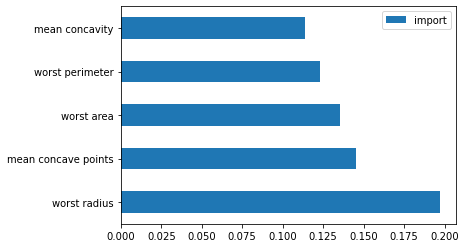

In [58]:
# 특성 중요도 부분 df화 시키기
# 그래프로도 그려보기
df1 = pd.DataFrame(feature_importance, columns=['import'],
                  index=cancer_data.feature_names)
df1_sort = df1.sort_values(by='import', ascending=False)
df1_sort.head().plot.barh() # plot.barh() : 가로막대
plt.show()

- 회귀와 분류에서 랜덤 포레스트 모델은 현재 가장 널리 사용되고 있는 머신러닝 알고리즘
- 랜덤 포레스트 모델은 성능이 매우 뛰어나고 매개변수의 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 조정해줄 필요가 없음

### 에이다부스트 모델(Adaptive Boosting)
 - RF처럼 의사결정 트리 모델 기반으로 만들어진 모델, 그러나 모델들이 독립적이지 않음
 - 회귀와 분류 모두 사용 가능
 - 모델의 개수 설정 : n_estimators
 - 사전 가지치기 기능 x
 - 학습률(learning_rate): 가중치 갱신의 변동폭을 조정, 0~1, 기본값 설정 1.0

In [59]:
# 필요한 모델 불러오기
from sklearn.ensemble import AdaBoostClassifier

# 모델 객체 생성 및 하이퍼 파라미터 조정
ada_model = AdaBoostClassifier(n_estimators=5, 
                               random_state = 66)
# 모델 훈련
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=5, random_state=66)

In [60]:
# 학습 및 테스트 데이터 예측 진행
train_pre = ada_model.predict(X_train)
test_pre = ada_model.predict(X_test)

# 예측 결과 출력
print('train 예측값 : ', train_pre)
print('test 예측값 :', test_pre)

train 예측값 :  [1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0
 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0
 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0
 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0
 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1]
test 예측값 : [1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0

In [63]:
# 학습 및 테스트 데이터 성능 확인
# 정확도 성능 평가 지표 기준
train_acc = accuracy_score(y_train, train_pre)
test_acc = accuracy_score(y_test, test_pre)

# f문자열 포매팅
print(f'훈련데이터 정확도:{train_acc:.3f}')
print(f'테스트데이터 정확도:{test_acc:.3f}')

훈련데이터 정확도:0.962
테스트데이터 정확도:0.972


In [66]:
# n_estimators를 변경해서 모델 생성 후 정확도까지 확인해보자
# 100으로 늘려보기
# 고정값 66
# 모델 생성 
ada_model2 = AdaBoostClassifier(n_estimators=100, # 예측기(트리모델 개수)
                               random_state=66)
# 학습
ada_model2.fit(X_train, y_train)
# 정확도 확인
print('훈련정확도 : ',ada_model2.score(X_train, y_train))
print('테스트정확도 : ',ada_model2.score(X_test, y_test))

훈련정확도 :  1.0
테스트정확도 :  0.986013986013986


### GridSearchCV 적용하여 모델의 성능을 향상 시키기

In [67]:
from sklearn.model_selection import GridSearchCV
# 1. 튜닝할 매개변수 ( 매개변수 경우의 수 ) 설정
params = {'n_estimators':[50,100,200],
         'learning_rate':[0.4,0.6,1.0]}

# 2. 모델 객체 생성
model = AdaBoostClassifier(random_state = 66)

# 3. 그리드 서치 설정 연결
grid = GridSearchCV(model, params , cv =5, scoring ='accuracy', n_jobs= -1) # scoring ='accuracy' : 정확도 기준으로 

# 4. 그리드 서치 실행
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=66), n_jobs=-1,
             param_grid={'learning_rate': [0.4, 0.6, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [68]:
# 최적의 하이퍼 파라미터 조합 확인
print(grid.best_params_)
# 최적의 성능 확인
print(grid.best_score_)

{'learning_rate': 1.0, 'n_estimators': 50}
0.969466484268126


#### Ada모델 완성 및 특성 중요도 확인

feature
 [0.   0.06 0.   0.02 0.   0.02 0.   0.06 0.   0.   0.04 0.02 0.04 0.1
 0.02 0.1  0.   0.04 0.04 0.02 0.02 0.1  0.   0.06 0.1  0.   0.06 0.04
 0.   0.04]


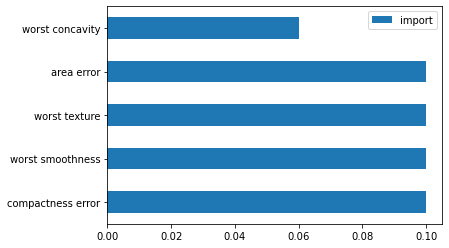

In [69]:
best_ada_model = AdaBoostClassifier(n_estimators = 50,
                                   learning_rate=1.0,
                                   random_state=66)

# 모델 학습
best_ada_model.fit(X_train, y_train)

# 특성 중요도 확인

feature_importance = best_ada_model.feature_importances_
print('feature\n',feature_importance)

df1 = pd.DataFrame(feature_importance, columns=['import'],
                  index=cancer_data.feature_names)
df1_sort = df1.sort_values(by='import', ascending=False)
df1_sort.head().plot.barh() # plot.barh() : 가로막대
plt.show()


#### GradientBoosting 모델
- 여러개의 트리를 묶어서 더욱 강력한 모델을 만드는 앙상블 방법
- Ada model과 유사
- 사전 가지치기 기능 사용 가능
- n_estimators : 예측기의 개수 설정
- learning_rate : 학습률 - 가중치 갱신 변동 폭을 지정
- 예측 성능이 높지만 과적합이 빠르게 됨, 시간이 오래 걸림
- max_depth 설정할 떄 트리깊이를 5보다 깊어지지 않게 설정

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
# 모델 생성 및 하이퍼 파라미터 설정 / 정보 : shift+tab
gb_model = GradientBoostingClassifier(random_state = 66)

# 모델 학습
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=66)

In [74]:
# 훈련 및 테스트 예측
train_pred = gb_model.predict(X_train)
test_pred = gb_model.predict(X_test)

# 훈련 및 테스트 정확도
train_result = accuracy_score(y_train, train_pred)
test_result = accuracy_score(y_test, test_pred)
print('훈련정확도 : ', train_result)
print('테스트정확도 : ', test_result)

훈련정확도 :  1.0
테스트정확도 :  0.958041958041958


#### GridSearchCV를 적용해 모델의 성능 향상

In [75]:
from sklearn.model_selection import GridSearchCV

# 튜닝 매개변수 정의
params = {'n_estimators':[50,100,200],
         'max_depth':[1,2,3,4],
         'learning_rate':[0.1,0.2,0.4]}

# 모델 정의

model = GradientBoostingClassifier(random_state=66)

# 그리드 서치 설정 정의

grid = GridSearchCV(model, params, cv=5, scoring = 'accuracy', n_jobs = -1 )

# 그리드 서치 실행(적용)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=66),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.4],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [76]:
# 하이퍼 파라미터 조합 확인
print('최적의 하이퍼 파라미터 : ', grid.best_params_)
# 최적의 성능 확인 
print('최적의 정확도 : ', grid.best_score_)

최적의 하이퍼 파라미터 :  {'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 100}
최적의 정확도 :  0.9647879616963065


#### GB모델 완성 및 특성 중요도 확인

feature
 [0.02155598 0.01117799 0.03011054 0.03138652 0.00063076 0.00229961
 0.11401401 0.14512616 0.00223768 0.00053808 0.00177181 0.0010437
 0.01322284 0.02678709 0.00098583 0.00213468 0.00208981 0.00056439
 0.00150838 0.00038851 0.19699973 0.01785632 0.12301346 0.13540438
 0.01011377 0.01696846 0.00903654 0.07814712 0.00159952 0.00128634]
feature
 [1.55337642e-04 5.19251795e-02 9.50866100e-04 2.62008048e-04
 4.81788234e-04 7.73947770e-06 2.62330514e-04 4.65948774e-02
 5.49262279e-04 2.75144024e-04 8.15033132e-03 5.81516014e-06
 7.04883864e-05 1.09975767e-02 8.02196393e-05 9.01041293e-03
 6.81852540e-04 8.70714263e-03 6.84795034e-05 6.80071023e-04
 1.78535078e-01 3.20876496e-02 7.18591626e-02 4.82263754e-01
 5.86049538e-03 6.26025515e-04 7.42142134e-03 8.05364634e-02
 8.69409890e-04 2.36175046e-05]


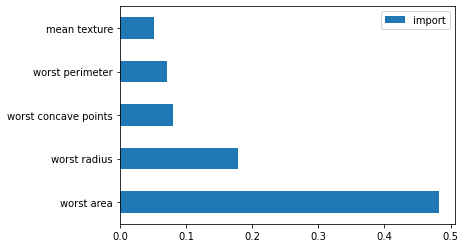

In [77]:
gb_model2 = GradientBoostingClassifier(learning_rate=0.4,
                                      max_depth = 3,
                                      n_estimators=100)

gb_model2.fit(X_train, y_train)

# 특성 중요도 확인

feature_importance = best_model.feature_importances_
print('feature\n',feature_importance)

# 모델 학습
gb_model2.fit(X_train, y_train)

# 특성 중요도 확인

feature_importance = gb_model2.feature_importances_
print('feature\n',feature_importance)

df1 = pd.DataFrame(feature_importance, columns=['import'],
                  index=cancer_data.feature_names)
df1_sort = df1.sort_values(by='import', ascending=False)
df1_sort.head().plot.barh() # plot.barh() : 가로막대
plt.show()

- 성능을 더 높이기 위해서는 부스팅 기법을 사용, 그러나 안정적인 배깅의 랜덤포레스트를 먼저 적용

### XGBoost 모델
- 결정 트리 기반의 앙상블 모델에서 가장 각광받고 있는 알고리즘의 하나
- 분류에 있어서 일반적으로 다른 머신 러닝 모델보다 뛰어난 성능을 나타냄
- GBM을 기반으로 하지만, GBM에서 제공하지 않는 Early Stopping 기능과 과대적합 방지를 위한 규제가 포함됨으로써 GBM의 단점인 느린 학습 시간과 과대적합의 문제를 해결하였음
- 대규모 머신 러닝 문제에 그래디언트 부스팅을 적용하려면 XGBoost를 사용
- 분류와 회귀가 모두 가능

In [78]:
!pip install xgboost

In [79]:
import xgboost
print(xgboost.__version__)

1.6.1


In [80]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [83]:
# 모델 예측 
test_pre = xgb_model.predict(X_test)
test_pre

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [84]:
# 모델 평가
accuracy_score(y_test, test_pre)

0.9790209790209791

In [85]:
# 과대적합 1.0 -> 하이퍼 파라미터 조정해줄 필요가 있음
# 하이퍼 파라미터 조합을 찾기 -> 그리드서치